In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
from google.colab import files
files.upload()

Saving testLabels.csv to testLabels.csv


{u'testLabels.csv': 'image,level,Usage\r\n1_left,0,Private\r\n1_right,0,Private\r\n2_left,0,Public\r\n2_right,0,Public\r\n3_left,2,Private\r\n3_right,2,Private\r\n4_left,2,Private\r\n4_right,2,Private\r\n5_left,0,Private\r\n5_right,0,Private\r\n6_left,1,Private\r\n6_right,1,Private\r\n7_left,0,Public\r\n7_right,0,Public\r\n8_left,2,Private\r\n8_right,2,Private\r\n9_left,4,Private\r\n9_right,4,Private\r\n11_left,0,Private\r\n11_right,0,Private\r\n12_left,0,Public\r\n12_right,0,Public\r\n14_left,0,Private\r\n14_right,0,Private\r\n18_left,0,Private\r\n18_right,0,Private\r\n24_left,0,Private\r\n24_right,0,Private\r\n26_left,0,Private\r\n26_right,0,Private\r\n27_left,0,Private\r\n27_right,0,Private\r\n28_left,0,Private\r\n28_right,0,Private\r\n29_left,1,Private\r\n29_right,0,Private\r\n32_left,0,Private\r\n32_right,0,Private\r\n34_left,0,Public\r\n34_right,0,Public\r\n35_left,0,Private\r\n35_right,0,Private\r\n37_left,2,Private\r\n37_right,2,Private\r\n38_left,0,Private\r\n38_right,0,Privat

In [0]:
!kaggle competitions download -c diabetic-retinopathy-detection

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!unzip test.zip


In [0]:
!cat train.zip.00*>train.zip
!cat test.zip.00*>test.zip
!unzip train.zip && unzip test.zip


In [0]:
!ls /content/gdrive/My\ Drive/set

In [0]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import np_utils
import tensorflow as tf
import skimage

eyes_db ='/content/gdrive/My Drive/set/'
labels_csv= '/content/gdrive/My Drive/Labels.csv'
drive='/content/gdrive/My Drive/'

In [0]:
!cp /content/gdrive/My\ Drive/eyes /content -rv

'/content/gdrive/My Drive/eyes' -> '/content/eyes'
cp: cannot access '/content/gdrive/My Drive/eyes': Input/output error


In [0]:
dr

'/content/gdrive/My Drive/Labels.csv'

In [0]:
# eyes = sorted( os.listdir(eyes_db) )            won't work with so many images
labels = pd.read_csv(labels_csv)
eyes=np.asarray(labels['image']+'.jpeg')
levels=np.asarray(labels['level'])
print labels.tail()
# print eyes, 'has size', len(eyes)
# print levels, 'has size', len(levels)

         image  level
88697  044349b      1
88698  044350a      0
88699  044350b      0
88700  044351a      0
88701  044351b      0


In [0]:
labels['img']=np.asarray()

<module 'pandas' from '/usr/local/lib/python2.7/dist-packages/pandas/__init__.pyc'>

In [0]:
import cv2 as cv


In [0]:
import cv2 as cv
l=[]
for itr in range(88702):
  img = cv.cvtColor(cv.resize(cv.imread(eyes_db+eyes[itr]),(256,256)), cv.COLOR_BGR2GRAY)
  print itr
  l.append(img)
labels['img']=l

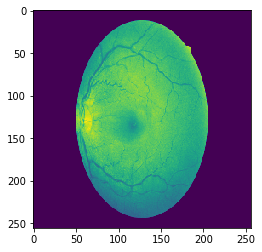

In [0]:
img=Image.open(eyes_db+eyes[56456])
plt.imshow(img.resize((256,256)).convert('L'))

In [1]:
#Dataset Processing 

immatrix = [] #to store the images
imlabel = [] #to store the labels
img_rows = 256
img_cols = 256

for file in eyes[10:11]:
    #Opening the image
    img = Image.open(eyes_db+file)
    #Resizing the image
    img_resized = img.resize((img_rows,img_cols))
    
    gray_img = img_resized.convert('grey')
    plt.imshow(gray_img)
    #Appending the image in 1D form
    immatrix.append(np.array(gray_img).flatten())
    
    

NameError: name 'eyes' is not defined

In [0]:
immatrix = np.asarray(immatrix)
imlabel = np.asarray(labels['level'])

In [0]:
plt.imshow(immatrix[20].reshape(img_rows,img_cols))

NameError: ignored

In [0]:
data, label = shuffle(immatrix, imlabel, random_state=24)
#Consolidating images and labels

trainData = [data, label]


In [0]:
(X, y) = (trainData[0], trainData[1])

#Splitting the data into Train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(X_train.shape)
print(X_test.shape)

#Reshaping the flattened numpy array into a image matrix 
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(80, 65536)
(20, 65536)
('X_train shape:', (80, 256, 256, 1))
(80, 'train samples')
(20, 'test samples')


In [0]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)

Y_train[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 5
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [0]:
#Keras CNN Architecture

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))

convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(256, 256,...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=8
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [0]:
model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/batchsize), epochs=2, validation_data=validation_generator, validation_steps=int(len(X_test)/batchsize))

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
10/10 [==============================] - 32s 3s/step - loss: 1.7700 - val_loss: 1.5465
Epoch 2/2
10/10 [==============================] - 28s 3s/step - loss: 1.1354 - val_loss: 1.5541


In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

20/20 [==============================] - 1s 47ms/step
1.5548347234725952


In [0]:
#Sample Prediction 
i = np.expand_dims(X_test[0], axis=0)
print(model.predict(i))
Y_test[0]

[[0.21269022 0.20744471 0.19642456 0.19074754 0.19269298]]


array([1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model


In [0]:
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [0]:
!ls -alt /content/gdrive/My\ Drive/test/ 

^C


In [0]:
!cd /content/gdrive/My\ Drive/eyes && pwd && ls -alt

/content/gdrive/My Drive/eyes
ls: cannot open directory '.': Input/output error


In [0]:
!pwd

/content


In [0]:
!ps -aux | grep sfsd

root         921  0.0  0.0  39196  6624 ?        S    20:01   0:00 /bin/bash -c ps -aux | grep sfsd
root         923  0.0  0.0  38572  5548 ?        S    20:01   0:00 grep sfsd
